# Cavern storage capacity

In [1]:
import os

import cartopy.crs as ccrs
import contextily as cx
import geopandas as gpd
import mapclassify as mc
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

# from matplotlib.lines import Line2D
from matplotlib_scalebar.scalebar import ScaleBar

from h2ss import capacity as cap
from h2ss import compare
from h2ss import data as rd
from h2ss import functions as fns

In [2]:
# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

## Halite data

In [3]:
ds, extent = rd.kish_basin_data_depth_adjusted(
    dat_path=os.path.join("data", "kish-basin"),
    bathymetry_path=os.path.join("data", "bathymetry"),
)

In [4]:
xmin, ymin, xmax, ymax = extent.total_bounds

In [5]:
ds

<xarray.Dataset> Size: 12MB
Dimensions:          (halite: 4, y: 237, x: 218)
Coordinates:
  * y                (y) float64 2kB 5.936e+06 5.936e+06 ... 5.889e+06 5.889e+06
  * x                (x) float64 2kB 6.966e+05 6.968e+05 ... 7.398e+05 7.4e+05
    spatial_ref      int64 8B 0
  * halite           (halite) <U8 128B 'Fylde' 'Mythop' 'Preesall' 'Rossall'
    crs              int64 8B 0
Data variables:
    BaseDepth        (halite, y, x) float64 2MB nan nan nan nan ... nan nan nan
    Thickness        (halite, y, x) float64 2MB nan nan nan nan ... nan nan nan
    TopDepth         (halite, y, x) float64 2MB nan nan nan nan ... nan nan nan
    TopTWT           (halite, y, x) float64 2MB nan nan nan nan ... nan nan nan
    TopDepthSeabed   (halite, y, x) float64 2MB nan nan nan nan ... nan nan nan
    BaseDepthSeabed  (halite, y, x) float64 2MB nan nan nan nan ... nan nan nan
    Bathymetry       (halite, y, x) float64 2MB nan nan nan nan ... nan nan nan

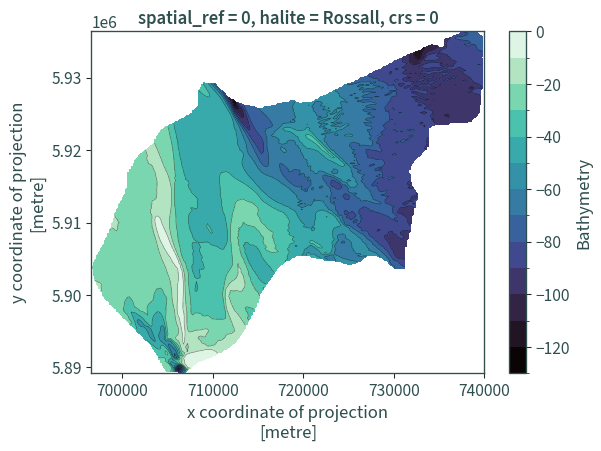

In [44]:
# ax = ds.isel(halite=3)["Bathymetry"].plot.contourf(cmap="mako")
ds.isel(halite=3)["Bathymetry"].plot.contourf(cmap="mako", levels=15)
CS = ds.isel(halite=3)["Bathymetry"].plot.contour(
    colors="black", levels=15, linewidths=0.5, alpha=0.5, linestyles="solid"
)
# plt.clabel(CS, inline=True)
plt.tight_layout()
plt.show()

In [45]:
import importlib

In [47]:
importlib.reload(rd)

<module 'h2ss.data' from '/mnt/Backup/Documents/Git/wind-to-hydrogen-toolkit/hydrogen-salt-storage/h2ss/data.py'>

In [48]:
bath = rd.bathymetry_layer(
    dat_extent=extent,
    bathymetry_path=os.path.join("data", "bathymetry"),
)

In [49]:
bath

<xarray.Dataset> Size: 14MB
Dimensions:             (x: 662, y: 597, cdi_index_count: 21797)
Coordinates:
  * x                   (x) float64 5kB 6.841e+05 6.842e+05 ... 7.449e+05
  * y                   (y) float64 5kB 5.94e+06 5.94e+06 ... 5.885e+06
    spatial_ref         int64 8B 0
    crs                 int64 8B 0
Dimensions without coordinates: cdi_index_count
Data variables:
    elevation           (y, x) float32 2MB nan nan nan nan ... nan nan nan nan
    value_count         (y, x) float64 3MB nan nan nan nan ... nan nan nan nan
    cdi_index           (y, x) float64 3MB nan nan nan nan ... nan nan nan nan
    interpolation_flag  (y, x) float32 2MB nan nan nan nan ... nan nan nan nan
    elevation_max       (y, x) float32 2MB nan nan nan nan ... nan nan nan nan
    elevation_min       (y, x) float32 2MB nan nan nan nan ... nan nan nan nan
    stdev               (y, x) float32 2MB nan nan nan nan ... nan nan nan nan
    cdi_reference       (cdi_index_count) object 174kB dask.array<chunksize=(1000,), meta=np.ndarray>
Attributes:
    dtm_convention_version:  1.0
    Conventions:             SeaDataNet_1.0 CF1.6
    title:                   The EMODnet Grid
    institution:             On behalf of the EMODnet project, http://www.emo...
    source:                  source of the data can be found in the dataset o...
    references:              WORK IN PROGRESS 2020 lastest release is DOI: 10...
    comment:                 The data in the EMODnet Grid should not be used ...
    history:                 NetCDF file created with GGSgc NC_Makegrid versi...

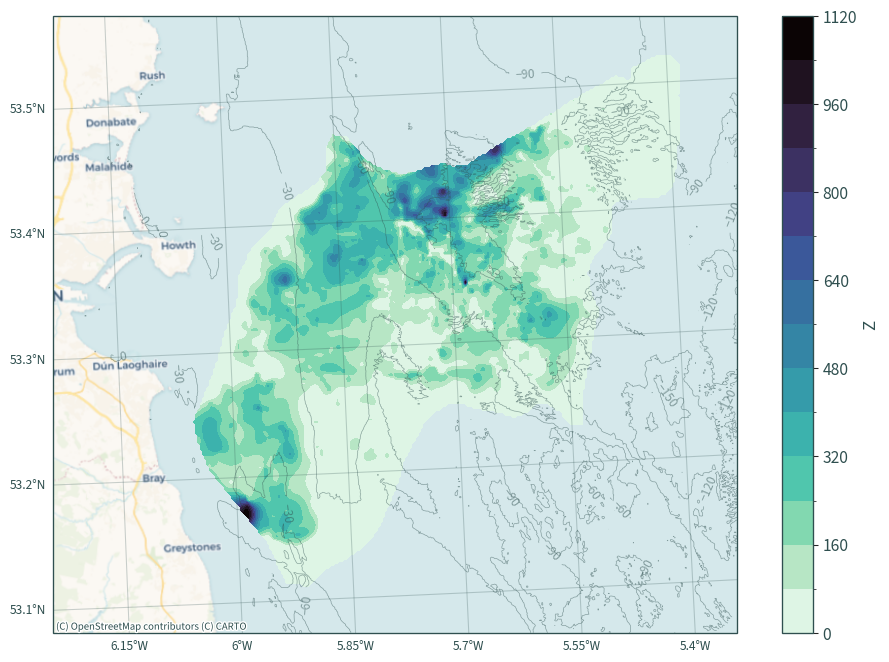

In [68]:
plt.figure(figsize=(10, 7))
ax = plt.axes(projection=ccrs.epsg(rd.CRS))
# ax = ds.isel(halite=3)["Bathymetry"].plot.contourf(cmap="mako")
ds.isel(halite=3)["Thickness"].plot.contourf(cmap="mako_r", levels=15)
# CS = ds.isel(halite=3)["Bathymetry"].plot.contour(colors="black", levels=15, linewidths=0.5, alpha=.5, linestyles="solid")
CS = bath["elevation"].plot.contour(
    colors="darkslategrey",
    levels=15,
    linewidths=0.5,
    linestyles="solid",
    alpha=0.5,
)
plt.clabel(CS, inline=True)
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs=rd.CRS)
ax.gridlines(
    draw_labels={"bottom": "x", "left": "y"},
    alpha=0.25,
    color="darkslategrey",
)
plt.title(None)
plt.tight_layout()
plt.show()

In [50]:
bath["elevation"]

<xarray.DataArray 'elevation' (y: 597, x: 662)> Size: 2MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x            (x) float64 5kB 6.841e+05 6.842e+05 ... 7.449e+05 7.449e+05
  * y            (y) float64 5kB 5.94e+06 5.94e+06 ... 5.885e+06 5.885e+06
    spatial_ref  int64 8B 0
    crs          int64 8B 0
Attributes:
    long_name:           Elevation relative to sea level
    units:               m
    sdn_parameter_urn:   SDN:P01::HGHTALAT
    sdn_parameter_name:  Sea-floor height (above Lowest Astronomical Tide dat...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres
    standard_name:       geoid_height_above_reference_ellipsoid

## Constraints

In [69]:
# exploration wells
_, wells_b = fns.constraint_exploration_well(
    data_path=os.path.join(
        "data",
        "exploration-wells",
        "Exploration_Wells_Irish_Offshore.shapezip.zip",
    )
)

# wind farms
wind_farms = fns.constraint_wind_farm(
    data_path=os.path.join(
        "data", "wind-farms", "marine-area-consent-wind.zip"
    )
)

# frequent shipping routes
_, shipping_b = fns.constraint_shipping_routes(
    data_path=os.path.join(
        "data", "shipping", "shipping_frequently_used_routes.zip"
    ),
    dat_extent=extent,
)

# shipwrecks
_, shipwrecks_b = fns.constraint_shipwrecks(
    data_path=os.path.join(
        "data", "shipwrecks", "IE_GSI_MI_Shipwrecks_IE_Waters_WGS84_LAT.zip"
    ),
    dat_extent=extent,
)

# subsea cables
_, cables_b = fns.constraint_subsea_cables(
    data_path=os.path.join("data", "subsea-cables", "KIS-ORCA.gpkg"),
    dat_extent=extent,
)

In [70]:
# distance from salt formation edge
edge_buffer = fns.constraint_halite_edge(dat_xr=ds)

## Zones of interest

In [71]:
zones, zds = fns.zones_of_interest(
    dat_xr=ds,
    constraints={"net_height": 120, "min_depth": 500, "max_depth": 2000},
)

## Generate caverns

In [72]:
caverns = fns.generate_caverns_hexagonal_grid(
    zones_df=zones,
    dat_extent=extent,
)

In [73]:
caverns = fns.cavern_dataframe(
    dat_zone=zds,
    cavern_df=caverns,
    depths={"min": 500, "min_opt": 1000, "max_opt": 1500, "max": 2000},
)

In [74]:
# label caverns by depth and heights
caverns = fns.label_caverns(
    cavern_df=caverns,
    heights=[120],
    depths={"min": 500, "min_opt": 1000, "max_opt": 1500, "max": 2000},
)

In [75]:
caverns, _ = fns.generate_caverns_with_constraints(
    cavern_df=caverns,
    exclusions={
        "wells": wells_b,
        "wind_farms": wind_farms,
        "shipwrecks": shipwrecks_b,
        "shipping": shipping_b,
        "cables": cables_b,
        "edge": edge_buffer,
    },
)

Without constraints...
Number of potential caverns: 568
------------------------------------------------------------
Excluding salt formation edges...
Number of potential caverns: 539
------------------------------------------------------------
Exclude shipping...
Number of potential caverns: 261
Caverns excluded: 51.58%
------------------------------------------------------------
Exclude wind farms...
Number of potential caverns: 218
Caverns excluded: 59.55%
------------------------------------------------------------
Exclude cables...
Number of potential caverns: 218
Caverns excluded: 59.55%
------------------------------------------------------------
Exclude wells...
Number of potential caverns: 218
Caverns excluded: 59.55%
------------------------------------------------------------
Exclude shipwrecks...
Number of potential caverns: 218
Caverns excluded: 59.55%
------------------------------------------------------------


## Capacity

### Cavern volume

In [77]:
caverns["cavern_total_volume"] = cap.cavern_volume(
    height=caverns["cavern_height"]
)
caverns["cavern_volume"] = cap.corrected_cavern_volume(
    v_cavern=caverns["cavern_total_volume"]
)

### Mid-point temperature

In [78]:
caverns["t_mid_point"] = cap.temperature_cavern_mid_point(
    height=caverns["cavern_height"], depth_top=caverns["cavern_depth"]
)

### Operating pressure

In [79]:
(
    caverns["p_operating_min"],
    caverns["p_operating_max"],
) = cap.pressure_operating(
    thickness_overburden=caverns["TopDepthSeabed"],
    depth_water=-caverns["Bathymetry"],
)

### Hydrogen gas density

In [80]:
caverns["rho_min"], caverns["rho_max"] = cap.density_hydrogen_gas(
    p_operating_min=caverns["p_operating_min"],
    p_operating_max=caverns["p_operating_max"],
    t_mid_point=caverns["t_mid_point"],
)

### Working mass of hydrogen

In [81]:
(
    caverns["working_mass"],
    caverns["mass_operating_min"],
    caverns["mass_operating_max"],
) = cap.mass_hydrogen_working(
    rho_h2_min=caverns["rho_min"],
    rho_h2_max=caverns["rho_max"],
    v_cavern=caverns["cavern_volume"],
)

### Energy storage capacity in GWh

In [82]:
caverns["capacity"] = cap.energy_storage_capacity(
    m_working=caverns["working_mass"]
)

## Stats

In [83]:
# proportion of working gas to total gas
caverns["working_mass_pct"] = caverns["working_mass"] / (
    caverns["working_mass"] + caverns["mass_operating_min"]
)

In [20]:
caverns.drop(
    columns=[
        "x",
        "y",
        "BaseDepth",
        "TopDepth",
        "TopTWT",
        "BaseDepthSeabed",
        "cavern_height",
        "cavern_total_volume",
        "cavern_volume",
    ]
).describe()

,Thickness,TopDepthSeabed,Bathymetry,NetToGross,ThicknessNet,cavern_depth,t_mid_point,p_operating_min,p_operating_max,rho_min,rho_max,working_mass,mass_operating_min,mass_operating_max,capacity,working_mass_pct
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,2.180000e+02,2.180000e+02,218.000000,218.000000,2.180000e+02,2.180000e+02,2.180000e+02,218.000000,218.000000
mean,429.724354,1074.020877,-50.338910,0.651980,283.015980,1154.020877,328.675783,8.061902e+06,2.149840e+07,5.608686,13.867715,3.260108e+06,2.213931e+06,5.474039e+06,108.634041,0.597511
std,72.560913,365.142804,13.127985,0.043909,69.215822,365.142804,13.692855,2.580140e+06,6.880373e+06,1.508555,3.480605,7.786651e+05,5.954757e+05,1.373908e+06,25.946851,0.007822
min,358.331500,422.745339,-73.351486,0.593197,212.561041,502.745339,304.252950,3.445968e+06,9.189247e+06,2.691914,6.945301,1.678950e+06,1.062586e+06,2.741537e+06,55.946359,0.581421
25%,384.750500,792.651330,-62.446541,0.617639,237.636862,872.651330,318.124425,6.071888e+06,1.619170e+07,4.470379,11.273416,2.685380e+06,1.764604e+06,4.449985e+06,89.482842,0.591309
50%,413.253450,1048.329146,-53.034470,0.644009,266.138995,1128.329146,327.712343,7.887979e+06,2.103461e+07,5.589250,13.892191,3.277441e+06,2.206259e+06,5.483701e+06,109.211632,0.597670
75%,446.045600,1353.385847,-41.985056,0.674348,300.789815,1433.385847,339.151969,1.004202e+07,2.677871e+07,6.804421,16.649315,3.886101e+06,2.685927e+06,6.572028e+06,129.493525,0.603458
max,822.710300,1900.680682,-18.320551,0.750000,617.032725,1980.680682,359.675526,1.382934e+07,3.687824e+07,8.691559,20.764429,4.765555e+06,3.430842e+06,8.196397e+06,158.798899,0.612412


In [21]:
# fixed values
caverns[["cavern_height", "cavern_total_volume", "cavern_volume"]].iloc[0]

cavern_height             120.000000
cavern_total_volume    563903.723294
cavern_volume          394732.606306
Name: 0, dtype: float64

In [22]:
# totals
caverns[
    [
        "cavern_volume",
        "working_mass",
        "capacity",
        "mass_operating_min",
        "mass_operating_max",
    ]
].sum()

cavern_volume         8.605171e+07
working_mass          7.107035e+08
capacity              2.368222e+04
mass_operating_min    4.826370e+08
mass_operating_max    1.193341e+09
dtype: float64

In [23]:
# compare with Ireland's electricity demand in 2050 (Deane, 2021)
compare.electricity_demand_ie(data=caverns["capacity"])

Energy capacity as a percentage of Ireland's electricity demand
in 2050 (84–122 TWh electricity): 11.65–16.92%


In [24]:
# compare with Ireland's hydrogen demand in 2050
compare.hydrogen_demand_ie(data=caverns["capacity"])

Energy capacity as a percentage of Ireland's domestic hydrogen
demand in 2050 (4.6–39 TWh hydrogen): 60.72–514.83%
Energy capacity as a percentage of Ireland's domestic and
non-domestic hydrogen demand in 2050 (19.8–74.6 TWh hydrogen): 31.75–119.61%


In [24]:
# total capacity at various depth/height combinations
s = caverns.groupby(["depth", "halite"], sort=False)[["capacity"]].sum()
s["%"] = s["capacity"] / caverns[["capacity"]].sum().iloc[0] * 100
s

,,capacity,%
depth,halite,,
"1,000 - 1,500",Rossall,11585.091442,48.918940
"500 - 1,000",Rossall,3884.416135,16.402246
"1,500 - 2,000",Rossall,4630.799533,19.553907
"1,000 - 1,500",Preesall,102.631996,0.433371
"500 - 1,000",Preesall,1353.174027,5.713881
"1,500 - 2,000",Preesall,151.843643,0.641171
"1,000 - 1,500",Fylde,574.503947,2.425887
"1,500 - 2,000",Fylde,597.204799,2.521743
"500 - 1,000",Fylde,802.555520,3.388852


In [25]:
s.groupby("depth").sum()[["capacity"]]

,capacity
depth,
"1,000 - 1,500",12262.227385
"1,500 - 2,000",5379.847975
"500 - 1,000",6040.145681


In [26]:
s.groupby("halite").sum()[["capacity"]]

,capacity
halite,
Fylde,1974.264266
Preesall,1607.649665
Rossall,20100.307110


In [27]:
# number of caverns
s = caverns.groupby(["depth", "halite"], sort=False)[["capacity"]].count()
s["%"] = s["capacity"] / len(caverns) * 100
s

,,capacity,%
depth,halite,,
"1,000 - 1,500",Rossall,99,45.412844
"500 - 1,000",Rossall,49,22.477064
"1,500 - 2,000",Rossall,32,14.678899
"1,000 - 1,500",Preesall,1,0.458716
"500 - 1,000",Preesall,17,7.798165
"1,500 - 2,000",Preesall,1,0.458716
"1,000 - 1,500",Fylde,5,2.293578
"1,500 - 2,000",Fylde,4,1.834862
"500 - 1,000",Fylde,10,4.587156


In [28]:
s.groupby("depth").sum()[["capacity"]]

,capacity
depth,
"1,000 - 1,500",105
"1,500 - 2,000",37
"500 - 1,000",76


In [29]:
s.groupby("halite").sum()[["capacity"]]

,capacity
halite,
Fylde,19
Preesall,19
Rossall,180


In [76]:
compare.distance_from_pipeline(
    caverns, os.path.join("data", "pipelines", "pipelines.zip")
)

Distance to nearest pipeline from caverns: 13.65–38.10 km (mean: 18.47 km)


## Map

In [84]:
# create exclusion buffer
buffer = pd.concat([wells_b, shipwrecks_b, shipping_b, cables_b]).dissolve()

In [117]:
def plot_map_alt(
    dat_xr,
    cavern_df,
    zones_gdf,
    classes,
    # quantity="capacity",
    # quantity_label="Hydrogen storage \ncapacity [GWh]",
    # top_depth=True,
    fontsize=11.5,
):
    """Helper function to plot caverns within the zones of interest"""
    plt.figure(figsize=(20, 11.5))
    axis1 = plt.axes(projection=ccrs.epsg(rd.CRS))
    legend_handles1 = []
    classes = sorted(classes)

    # bath["elevation"].plot.contourf(cmap="Blues_r", robust=True, add_colorbar=False)
    CS = bath["elevation"].plot.contour(
        colors="tab:blue",
        linewidths=0.5,
        linestyles="solid",
        alpha=0.5,
        robust=True,
    )
    plt.clabel(CS, inline=True)

    # halite boundary - use buffering to smooth the outline
    shape = rd.halite_shape(dat_xr=dat_xr).buffer(1000).buffer(-1000)
    shape.plot(
        ax=axis1,
        edgecolor="darkslategrey",
        color="none",
        linewidth=2,
        alpha=0.5,
        zorder=2,
    )
    legend_handles1.append(
        mpatches.Patch(
            facecolor="none",
            linewidth=2,
            edgecolor="darkslategrey",
            label="Kish Basin boundary",
            alpha=0.5,
        )
    )

    zones_gdf.plot(
        ax=axis1, zorder=1, linewidth=0, facecolor="white", alpha=0.45
    )
    zones_gdf.plot(
        ax=axis1,
        zorder=2,
        edgecolor="slategrey",
        linestyle="dotted",
        linewidth=1.25,
        facecolor="none",
    )
    legend_handles1.append(
        mpatches.Patch(
            facecolor="none",
            linestyle="dotted",
            edgecolor="slategrey",
            label="Area of interest",
            linewidth=1.25,
        )
    )

    pd.concat([buffer, wind_farms]).dissolve().clip(shape).plot(
        ax=axis1,
        facecolor="none",
        linewidth=0.65,
        edgecolor="slategrey",
        zorder=2,
        alpha=0.5,
        hatch="//",
    )
    legend_handles1.append(
        mpatches.Patch(
            facecolor="none",
            hatch="//",
            edgecolor="slategrey",
            label="Exclusion",
            alpha=0.65,
            linewidth=0.5,
        )
    )

    legend_handles1.append(
        mpatches.Patch(
            label="Hydrogen storage \ncapacity [GWh]", visible=False
        )
    )

    colours = [int(n * 255 / (len(classes) - 1)) for n in range(len(classes))]
    for n, y in enumerate(colours):
        if n == 0:
            # c = cavern_df[cavern_df["capacity"] < classes[0]]
            label1 = f"< {classes[0]:.0f}"
        elif n == len(colours) - 1:
            # c = cavern_df[cavern_df["capacity"] >= classes[-2]]
            label1 = f"≥ {classes[-2]:.0f}"
        else:
            # c = cavern_df[
            #     (cavern_df["capacity"] >= classes[n - 1])
            #     & (cavern_df["capacity"] < classes[n])
            # ]
            label1 = f"{classes[n - 1]:.0f}–<{classes[n]:.0f}"
        # if top_depth:
        #     for df, markersize in zip(
        #         [
        #             c[c["depth"] == "500 - 1,000"],
        #             c[c["depth"] == "1,000 - 1,500"],
        #             c[c["depth"] == "1,500 - 2,000"],
        #         ],
        #         [20, 50, 20],
        #     ):
        #         if len(df) > 0:
        #             df.centroid.plot(
        #                 ax=axis1,
        #                 zorder=3,
        #                 linewidth=0,
        #                 marker=".",
        #                 markersize=markersize,
        #                 color=sns.color_palette("flare", 256)[y],
        #             )
        # else:
        gpd.GeoDataFrame(cavern_df, geometry=cavern_df.centroid).plot(
            ax=axis1,
            scheme="UserDefined",
            classification_kwds={"bins": classes},
            column="capacity",
            zorder=3,
            marker=".",
            cmap="flare",
            markersize=40,
        )
        legend_handles1.append(
            mpatches.Patch(
                facecolor=sns.color_palette("flare", 256)[y], label=label1
            )
        )

    # if top_depth:
    #     legend_handles1.append(
    #         mpatches.Patch(label="Cavern top depth [m]", visible=False)
    #     )
    #     for markersize, label1 in zip(
    #         [6, 3], ["1,000–1,500", "500–1,000 or \n1,500–2,000"]
    #     ):
    #         legend_handles1.append(
    #             Line2D(
    #                 [0],
    #                 [0],
    #                 marker=".",
    #                 linewidth=0,
    #                 label=label1,
    #                 color="darkslategrey",
    #                 markersize=markersize,
    #             )
    #         )

    plt.xlim(shape.bounds["minx"][0] - 1000, shape.bounds["maxx"][0] + 1000)
    plt.ylim(shape.bounds["miny"][0] - 1000, shape.bounds["maxy"][0] + 1000)

    basemap = cx.providers.CartoDB.VoyagerNoLabels
    cx.add_basemap(
        axis1, crs=rd.CRS, source=basemap, zoom=12, attribution=False
    )
    axis1.text(
        shape.bounds["minx"][0] - 800,
        shape.bounds["miny"][0] - 800,
        basemap["attribution"],
        fontsize=10,
    )

    axis1.gridlines(
        draw_labels={"bottom": "x", "left": "y"},
        alpha=0.25,
        color="darkslategrey",
        xlabel_style={"fontsize": fontsize},
        ylabel_style={"fontsize": fontsize, "rotation": 90},
        xformatter=LongitudeFormatter(auto_hide=False, dms=True),
        yformatter=LatitudeFormatter(auto_hide=False, dms=True),
    )
    axis1.add_artist(
        ScaleBar(
            1,
            box_alpha=0,
            location="lower right",
            color="darkslategrey",
            width_fraction=0.0075,
            font_properties={"size": fontsize},
        )
    )
    plt.legend(
        loc="lower right",
        bbox_to_anchor=(1, 0.05),
        handles=legend_handles1,
        fontsize=fontsize,
    )
    plt.title(None)

    plt.tight_layout()
    # plt.savefig(
    #     os.path.join("graphics", "fig_caverns_capacity_ntg.jpg"),
    #     format="jpg",
    #     dpi=600,
    # )
    plt.show()

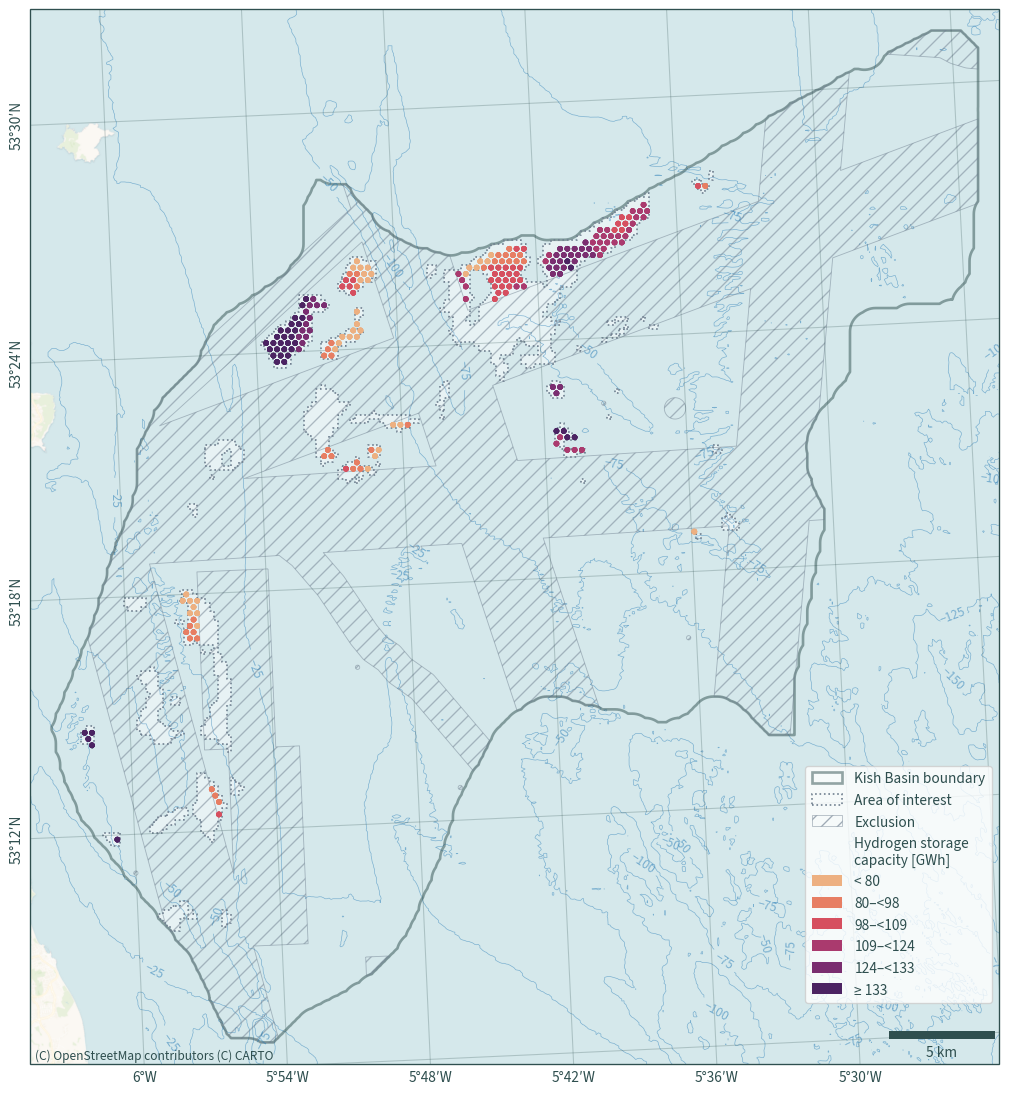

In [118]:
plot_map_alt(
    ds, caverns, zones, list(mc.Quantiles(caverns["capacity"], k=6).bins)
)

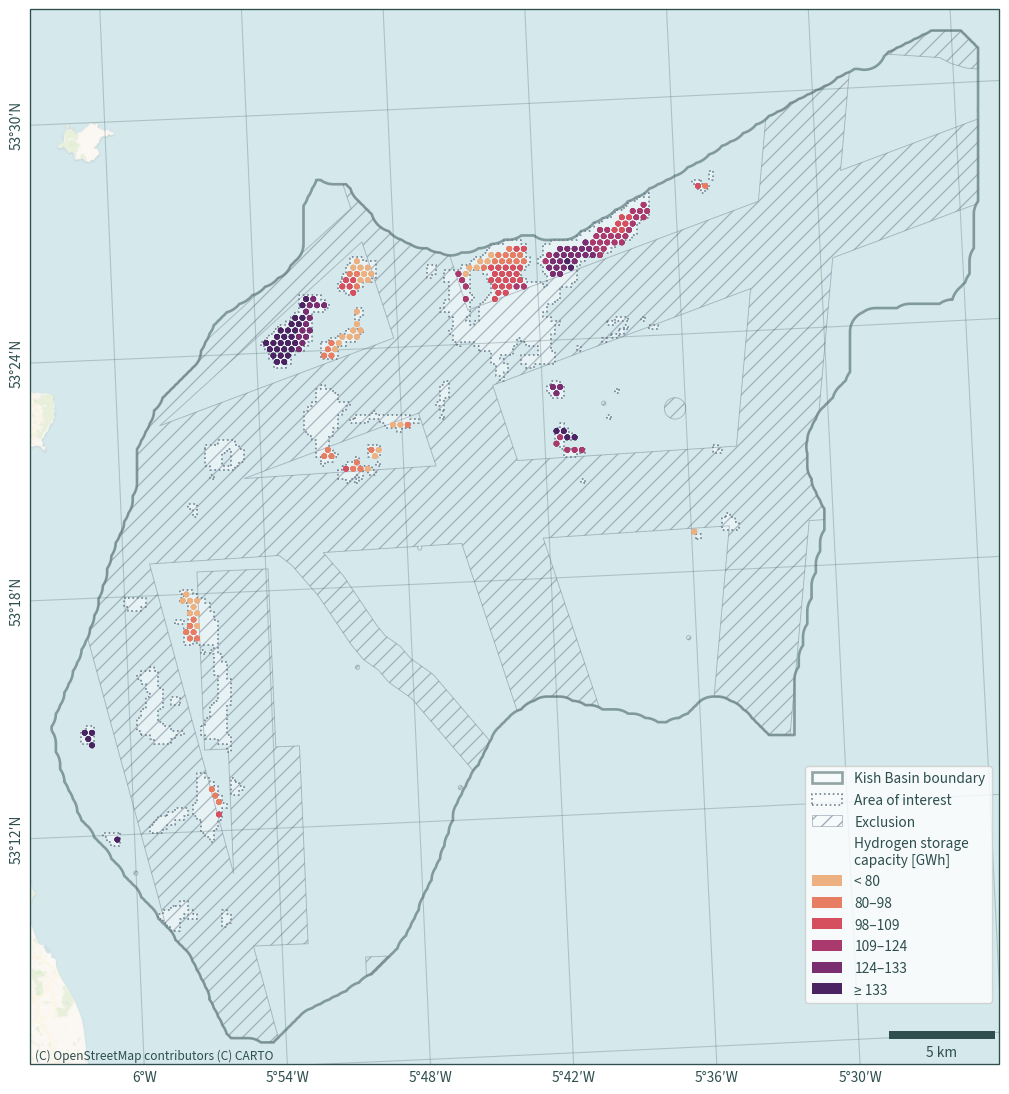

In [32]:
plot_map_alt(
    ds, caverns, zones, list(mc.Quantiles(caverns["capacity"], k=6).bins)
)